In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
X = df.iloc[:, [3,4]]
X[:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
rs = 42

# Hyper-parameter tuning

In [13]:
from sklearn.cluster import KMeans

grid = range(2,20)
wcss = [ KMeans(n_clusters=i, init='k-means++', random_state=rs).fit(X).inertia_ for i in grid ]

In [29]:
htDf = pd.DataFrame({'grid': grid, 'wcss': wcss})
htDf.head(20)

,grid,wcss
0,2,181363.595960
1,3,106348.373062
2,4,73679.789039
3,5,44448.455448
4,6,37265.865205
5,7,30241.343618
6,8,25336.946861
7,9,21850.165283
8,10,19634.554629
9,11,17602.190468


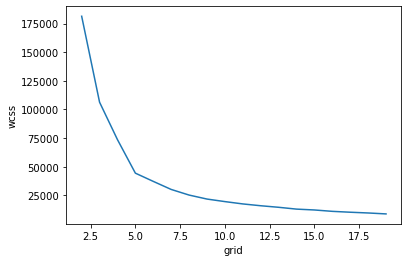

In [20]:
sns.lineplot(data=htDf, x='grid', y='wcss', markers=True)

Elbow found at n_clusters=5

# Apply K-Means

In [30]:
kmeans = KMeans(n_clusters=5, random_state=rs)
df['cluster'] = kmeans.fit_predict(X)

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

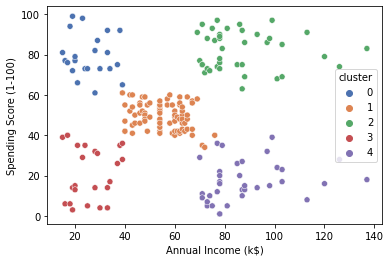

In [35]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='deep')

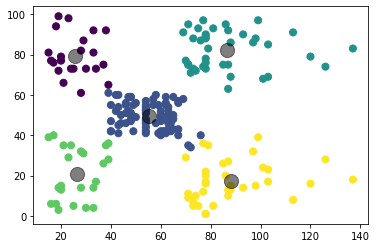

In [50]:
plt.scatter(df.iloc[:,3], df.iloc[:,4], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=.5)